In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
len(X_train)

60000

In [23]:
len(X_test)

10000

In [24]:
X_train[0].shape

(28, 28)

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

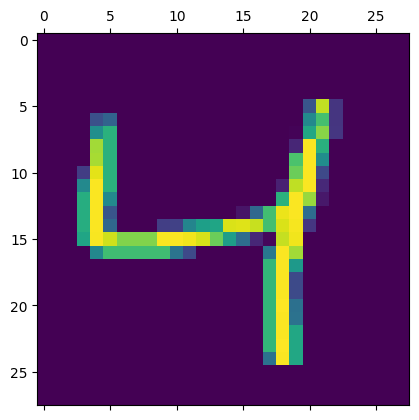

In [26]:
plt.matshow(X_train[2])

In [27]:
y_train[2]

4

In [28]:
X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [30]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [31]:
X_train_flattened.shape

(60000, 784)

In [32]:
# input 28*28 = 784, output 10  
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-08-19 16:49:56.433705: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 1ms/step - loss: 0.4723 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9261


In [33]:
model.evaluate(X_test_flattened, y_test)

 60/313 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.9078 

2023-08-19 16:51:19.142029: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 981us/step - loss: 0.2656 - accuracy: 0.9271


[0.26555904746055603, 0.9271000027656555]

In [34]:
y_predicted = model.predict(X_test_flattened)

103/313 [========>.....................] - ETA: 0s

2023-08-19 16:51:20.412077: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 949us/step


In [35]:
y_predicted[9]

array([1.5268024e-04, 5.1696393e-08, 1.5256853e-05, 6.4318703e-04,
       8.2134223e-01, 2.2684906e-03, 2.2193548e-05, 9.2097038e-01,
       3.1390843e-01, 9.9748391e-01], dtype=float32)

In [36]:
y_test[9]

9

In [37]:
np.argmax(y_predicted[9])

9

In [41]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [42]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1115,    4,    1,    0,    1,    4,    2,    8,    0],
       [   4,    7,  944,   11,    7,    2,   11,   10,   31,    5],
       [   2,    0,   26,  915,    0,   24,    2,   12,   21,    8],
       [   1,    1,    6,    2,  905,    0,   10,    4,    8,   45],
       [  10,    3,    4,   34,   11,  761,   18,    8,   35,    8],
       [  13,    3,    9,    1,    7,   10,  912,    2,    1,    0],
       [   1,    6,   24,    3,    7,    0,    0,  952,    1,   34],
       [   8,    9,    8,   18,    9,   19,    9,   11,  872,   11],
       [  10,    7,    2,   10,   18,    5,    0,   21,    6,  930]],
      dtype=int32)>

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Text(95.72222222222221, 0.5, 'Truth')

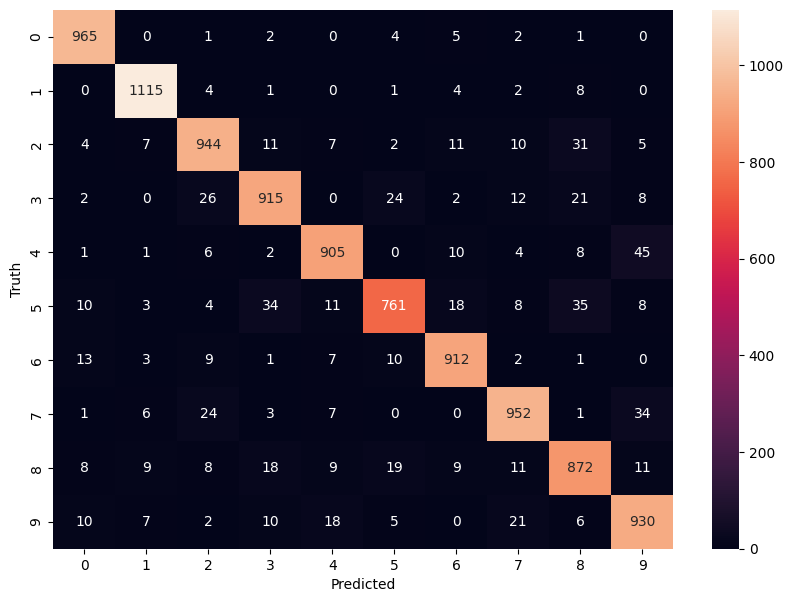

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add hidden layer

In [46]:
# use keras flatten layer instead of suppling flatened input
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),  # First hidden layer with 256 neurons
    keras.layers.Dense(128, activation='relu'),  # Second hidden layer with 128 neurons
    keras.layers.Dense(80, activation='relu'),  # third hidden layer with 80 neurons
    keras.layers.Dense(40, activation='relu'),  # third hidden layer with 40 neurons
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2231 - accuracy: 0.9332
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0980 - accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0689 - accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0553 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9861


In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0774 - accuracy: 0.9784


[0.0774223729968071, 0.9783999919891357]

In [48]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

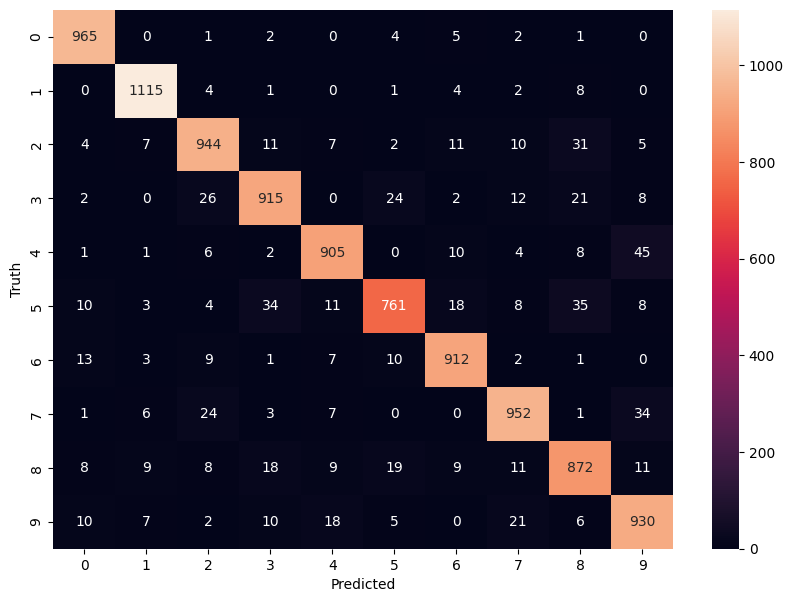

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')